In [159]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path
from sklearn.metrics import log_loss

In [0]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [0]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [0]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [0]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

In [167]:
X.shape

(500, 2)

In [168]:
y.shape

(500,)

In [0]:
#X = np.vstack([X,[2, -0.97]]) #agrego un punto azul para probar de mejorar la clasificacion

In [0]:
#y = np.hstack([y, 1]) #agrego la clase del punto que agregué

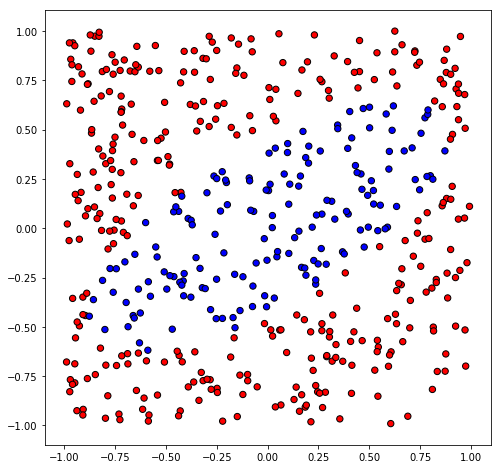

In [171]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [0]:
model = LogisticRegression(solver='lbfgs', C=1) #aca se pueden cambiar hyperparm para probar, como C por ejemplo

In [173]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

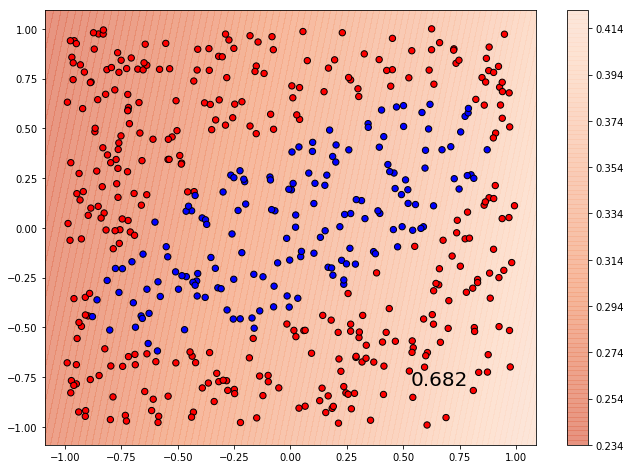

In [174]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [175]:
model.predict_proba(np.array([0.5, -0.75]).reshape(1,2)) #pregunta 3.1 hay que hacer el reshape para obtener las probabilidades

array([[0.63053289, 0.36946711]])

In [176]:
model.predict_proba(np.array([[0.5, -0.75]])) #pregunta 3.2 hay que hacer el reshape para obtener las probabilidades

array([[0.63053289, 0.36946711]])

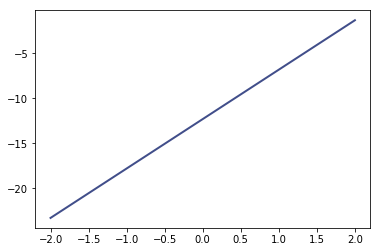

In [177]:
# B0+B1*x1+B2*x2=0
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1] #recta donde: coef_[0][0] es beta 1 y #coef_[0][2] es beta 2
plt.plot(x1, x2, color='#414e8a', linewidth=2) 

In [178]:
-model.coef_[0][0] / model.coef_[0][1] #pendiente de la recta es depejar X2

5.49035121886291

In [179]:
-model.intercept_[0] / model.coef_[0][1] #ordenada a la origen

-12.28977925697609

In [180]:
model.coef_ #coeficientes B1 y B2 (Beta1 y Beta2) que calcula el modelo. Conclusion: coef altos da modelos mas seguros (ojo al overfitting)

array([[ 0.33368331, -0.06077631]])

In [181]:
model.intercept_ #Beta 0

array([-0.74692749])

In [183]:
#PREGUNTA3.4
log_loss(y, model.predict_proba(X)[:,1]) #le tengo que pasar la columna 1 de X que es la columna de probabilidad de que sea 1. Esto es por definicion de la log_loss

0.6208125613102843

# Regresión polinomial

In [0]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [0]:
# Completar la función EJERCICIO PARA HACER APPENDS 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1,1) , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X, (X[:,1]**2).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 1ra columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1) #primero los unos y luego el X
    return X

In [0]:
add_columns(X).shape

(500, 6)

In [0]:
X_FE = add_columns(X)

In [0]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=1) # que no calcule el intercept porque ya hay una columna de "1" en X, esto se hace para que se grafique bien, no afecta a modelo

In [0]:
model_poly.fit(X_FE, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

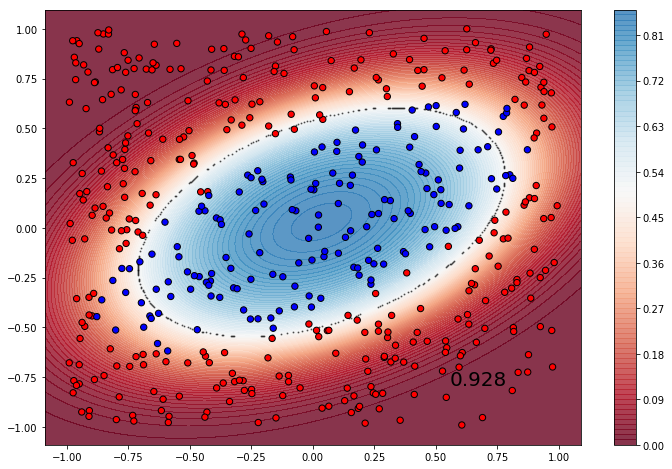

In [0]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

# Regularización

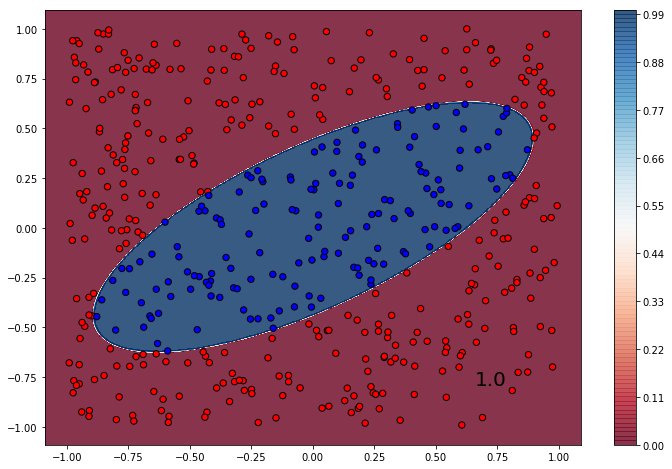

In [0]:
C = 1 # Modifique el valos de C
model_poly_sinreg = LogisticRegression(solver='lbfgs', fit_intercept=False, C=1e9)
model_poly_sinreg.fit(X_FE, y)
plt.figure(figsize=(12,8))
score = model_poly_sinreg.score(X_FE, y)
plot_boundaries(X,y, score, probability_func=model_poly_sinreg.predict_proba, mesh_res=500, degree=2)

In [0]:
#SIn REgularizacion C=1e9
model_poly_sinreg.coef_

array([[  693.50697567,   -10.81014051,    25.47358024, -1749.03219591,
         3529.94085204, -3540.99983693]])

In [0]:
#SIn REgularizacion C=1
model_poly.coef_

array([[ 1.77695296,  0.15325275,  0.23806428, -3.84273315,  4.054581  ,
        -6.46772526]])